<a href="https://colab.research.google.com/github/aminfazy/IITP_BSE_2022/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN example**

In [1]:
import numpy as np


In [2]:
from keras.models import Sequential # importing Sequential model from keras models
from keras.layers import Embedding, SimpleRNN # importing Embedding layer and SimpleRNN layer from keras layers

# Embedding Layer

> details @ https://keras.io/layers/embeddings/

> used to create an embedding....embed higher dimensional data into lower dimensional vector space

> Embedding layer is the first layer in the model

> Keras provides method to add an embedding layer

> keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', .... , input_length=None)

> * input_dim: An interger greater than 0 which specifies the size of the vocabulary, i.e. maximum integer index + 1 such that data is integer encoded from 0 - maximum integer index. It can be thought of as the number of distinct words.

> * output_dim: An integer greater than 0 which specifies the dimension of vector space in which words will be embedded

> * embeddings_initializer: Initializer for the embeddings matrix...Keras provides support to many initializers such as uniform, RandomNormal, RandomUniform, and so on (details @ https://keras.io/initializers/) 


> * input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed)



# SimpleRNN


---

> to add simple recurrent neural network layers

> keras.layers.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', return_sequences=False, return_state=False, ......)

> * details @ https://keras.io/layers/recurrent/

> * creates Fully-connected RNN where the output is to be fed back to input.

> * units: Positive integer, dimensionality of the output space.

> * activation: Activation function to use (see activations). Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).

> * use_bias: Boolean, whether the layer uses a bias vector.

> * kernel_initializer: Initializer for the kernel weights matrix, used for the linear transformation of the inputs

> * return_sequences: Boolean. If true,  returns the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), however, if false returns only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features))



In [3]:
# using a RNN model on the IMDB movie review classification problem

# data  preprocessing

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
# pad_sequences is used to ensure that all sequences in a list have the same length. 
# Keras sequence.pad_sequence(): This function transforms a list of num_samples sequences (lists of integers) into a 2D 
# Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen argument if provided, or the
# length of the longest sequence otherwise.
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
# define a simple recurrent network using an Embedding layer and a SimpleRNN layer
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

print ("keep going...")

# another architecture with 64 features

#from keras.layers import Dense

#model = Sequential()
#model.add(Embedding(max_features, 64))
#model.add(SimpleRNN(64))
#model.add(Dense(1, activation='sigmoid'))

#print ("keep going...")

# another architecture with 64 features and more layers

#from keras.layers import Dense

#model = Sequential()
#model.add(Embedding(max_features, 64))
#model.add(SimpleRNN(64, return_sequences=True))
#model.add(SimpleRNN(64, return_sequences=True))
#model.add(SimpleRNN(64))
#model.add(Dense(1, activation='sigmoid'))

#print ("keep going...")

keep going...


In [5]:
# configure learning
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

print ("keep going...")

keep going...


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train 
history = model.fit(input_train, y_train, epochs=1, batch_size=128, validation_split=0.2)

print ("keep going...")

157/157 [==============================] - 27s 162ms/step - loss: 0.6687 - acc: 0.5774 - val_loss: 0.5392 - val_acc: 0.7572
keep going...


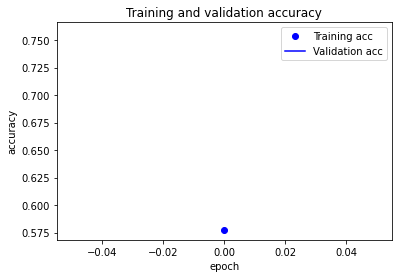

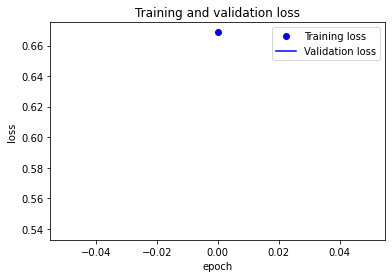

In [7]:
# plot loss and accuracy in training and validation 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc') # plot epochs and acc using blue circle markers
plt.plot(epochs, val_acc, 'b', label='Validation acc') # plot epochs and val_acc using blue line
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [8]:
# Evaluate model
scores = model.evaluate(input_test, y_test)
print("Error: %.2f%%" % (100-scores[1]*100))

782/782 [==============================] - 21s 26ms/step - loss: 0.5412 - acc: 0.7478
Error: 25.22%


In [9]:
# print model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


**Few Sources to Explore**


---

 https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://keras.io/layers/embeddings/

https://keras.io/initializers/

